In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import entropy, skew
from math import e
import powerlaw
from sklearn.preprocessing import MinMaxScaler


from src.graph.centralities.betweenness_centrality import cal_betweenness_centrality
from src.dataset.dataset_info import datasets

In [2]:
my_datasets = [
    datasets["cic_ton_iot"],
    datasets["cic_ids_2017"],
    datasets["cic_bot_iot"],
    datasets["cic_ton_iot_modified"],
    datasets["ccd_inid_modified"],
    datasets["nf_uq_nids_modified"],
    datasets["edge_iiot"],
    datasets["nf_cse_cic_ids2018"],
    datasets["nf_uq_nids"],
    datasets["x_iiot"],
]

In [3]:
def check_if_scale_free(centrality_sequence, title="Centrality Distribution"):
    fit = powerlaw.Fit(centrality_sequence)
    print(f"==>> fit.alpha: {fit.alpha}")
      
    bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
    hist, bins = np.histogram(centrality_sequence, bins=bins, density=True)

    # Compute bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Plot the observed degree distribution (log-log scale)
    plt.scatter(bin_centers, hist, color='blue', alpha=0.7, label="Observed Data")

    # Overlay the fitted power-law line
    fit.power_law.plot_pdf(color='red', linestyle="--", label=f"Power-Law Fit (γ={fit.alpha:.2f})")

    # Log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Labels, title, and legend
    plt.xlabel("Centrality Value (k)")
    plt.ylabel("P(k) (Probability Density)")
    plt.title(title)
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.legend()

    plt.show()
    
    scale_free = fit.alpha > 2 and fit.alpha < 3
    if scale_free:
        print("This graph is likely scale-free.")
    else:
        print("This graph is NOT scale-free.")
        
    return fit.alpha, scale_free

In [4]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    e1 = -(vc * np.log(vc)/np.log(base)).sum()
    return e1

In [5]:
def centrality_analysis(centrality_sequence, dataset_name, centrality_name):
    a = np.array(centrality_sequence)
    print(f"==>> len(a): {len(a)}")
    print(f"==>> len(np.unique(a)): {len(np.unique(a))}")
    
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(centrality_sequence.reshape(-1, 1)).flatten()

    centrality_skewness = skew(normalized_values)
    print(f"Skewness: {centrality_skewness}")
    
    vc = np.unique(normalized_values, return_counts=True)[1]
    centrality_entropy = entropy(pk = vc)
    # centrality_entropy = pandas_entropy(normalized_values)  # Avoid log(0) issue
    # centrality_entropy = entropy(normalized_values + 1e-10)  # Avoid log(0) issue
    print(f"Entropy: {centrality_entropy}")
    
    alpha, scale_free = check_if_scale_free(centrality_sequence, title=f"{centrality_name} Distribution of :{dataset_name}")
    # alpha, scale_free = 0, 0
    
    return centrality_skewness, centrality_entropy, alpha, scale_free
    

In [6]:
results = {}

dataset: cic_ton_iot
==> betweenness_centrality:
==>> len(a): 142669
==>> len(np.unique(a)): 157
Skewness: 165.88241621854556
Entropy: 0.017266664628926294
Calculating best minimal value for power law fit
==>> fit.alpha: 1.2628395344921874


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


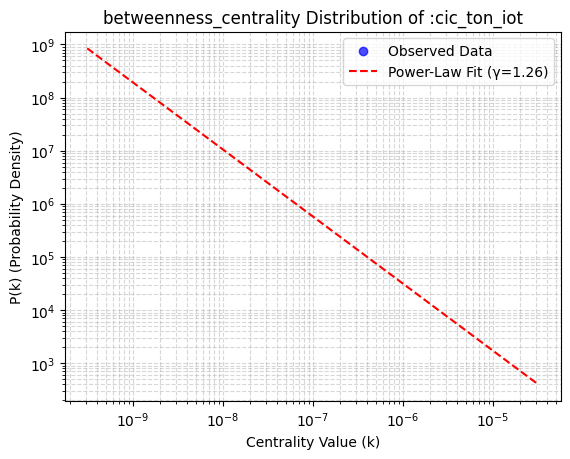

This graph is NOT scale-free.
dataset: cic_ids_2017
==> betweenness_centrality:
==>> len(a): 19129
==>> len(np.unique(a)): 9042
Skewness: 45.21095301344761
Entropy: 5.516442414175822
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


==>> fit.alpha: 1.4936521670361729


C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


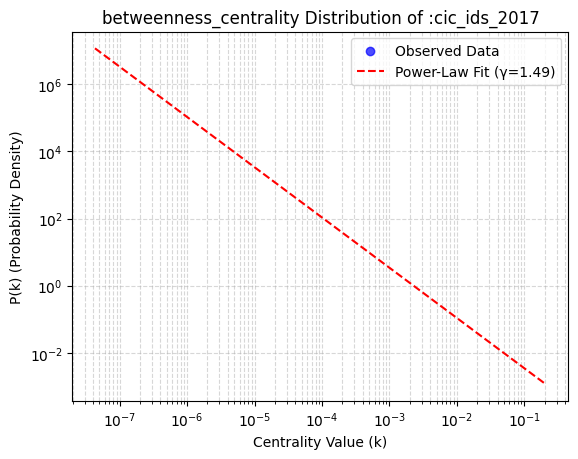

This graph is NOT scale-free.
dataset: cic_bot_iot
==> betweenness_centrality:
==>> len(a): 294
==>> len(np.unique(a)): 13
Skewness: 16.84493266061454
Entropy: 0.2719546176633483
Calculating best minimal value for power law fit
==>> fit.alpha: 2.1759563810475475


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


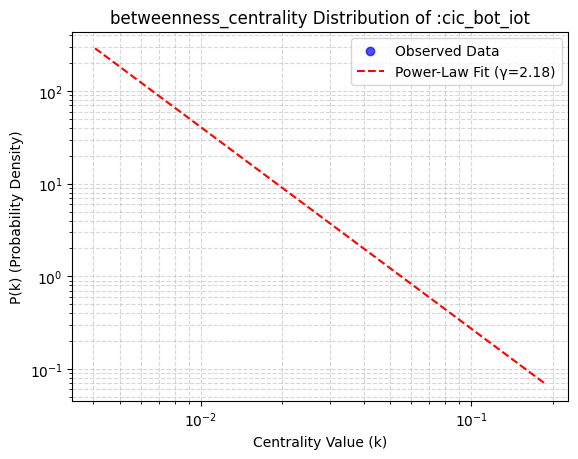

This graph is likely scale-free.
dataset: cic_ton_iot_modified
==> betweenness_centrality:
==>> len(a): 65543
==>> len(np.unique(a)): 97
Skewness: 117.4072116263413
Entropy: 0.022154504574384466
Calculating best minimal value for power law fit
==>> fit.alpha: 1.6391401113911952


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


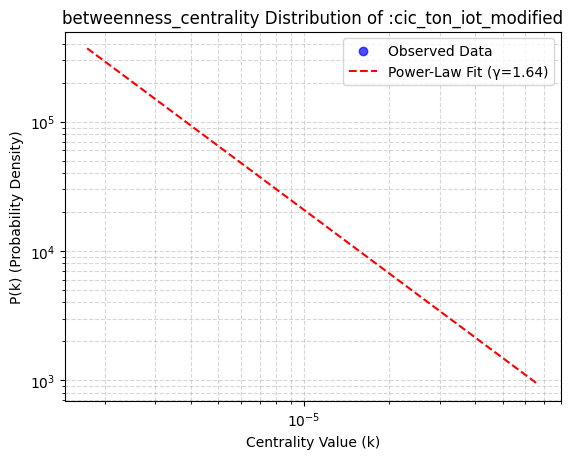

This graph is NOT scale-free.
dataset: ccd_inid_modified
==> betweenness_centrality:
==>> len(a): 103
==>> len(np.unique(a)): 17
Skewness: 6.370374398287909
Entropy: 0.8625541695602301
Calculating best minimal value for power law fit
==>> fit.alpha: 1.4080549302743417


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


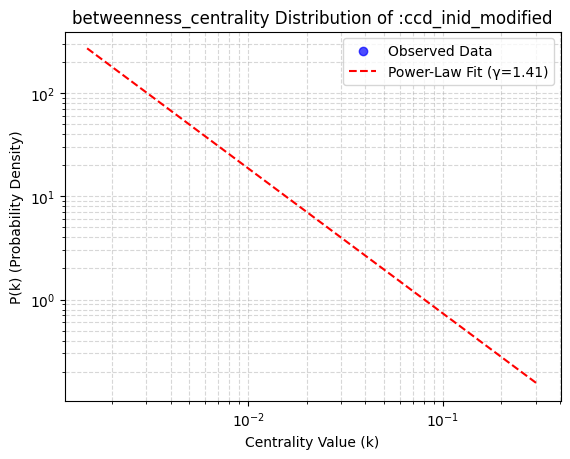

This graph is NOT scale-free.
dataset: nf_uq_nids_modified
==> betweenness_centrality:
==>> len(a): 163
==>> len(np.unique(a)): 43
Skewness: 11.787970261731486
Entropy: 1.5336848264680776
Calculating best minimal value for power law fit
==>> fit.alpha: 1.9132118566769343


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


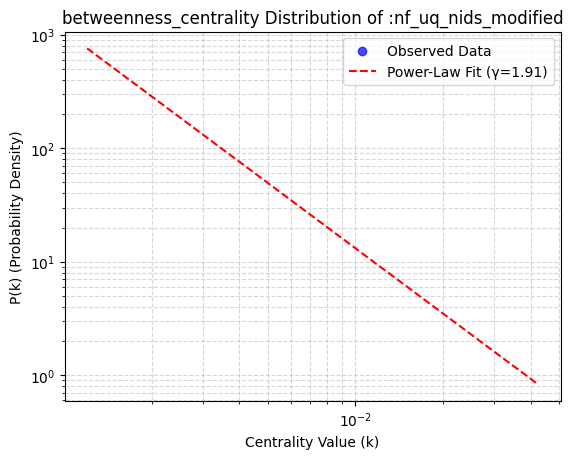

This graph is NOT scale-free.
dataset: edge_iiot
==> betweenness_centrality:
==>> len(a): 176695
==>> len(np.unique(a)): 3
Skewness: 420.3474749402126
Entropy: 0.00014807634287186485
Calculating best minimal value for power law fit
==>> fit.alpha: 1.1883484611210469


Values less than or equal to 0 in data. Throwing out 0 or negative values
C:\Users\Administrateur\AppData\Local\Temp\3\ipykernel_19444\4176641044.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(min(centrality_sequence)), np.log10(max(centrality_sequence)), 20)
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\Administrateur\Desktop\GNN-NIDS\.venv\Lib\site-packages\numpy\_core\function_base.py:178: RuntimeWarning: invalid value encountered in add
  y += start


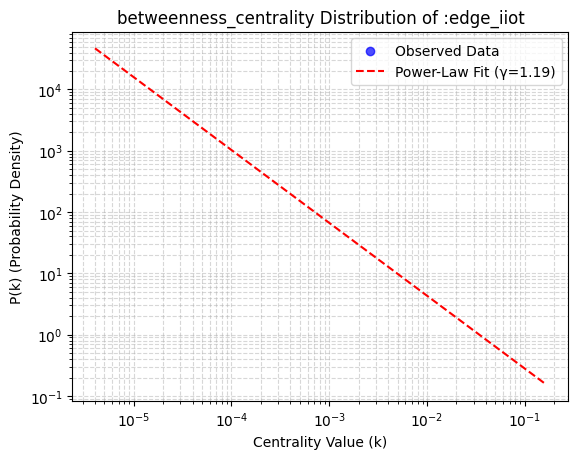

This graph is NOT scale-free.
dataset: nf_cse_cic_ids2018
==> betweenness_centrality:


In [7]:
for dataset in my_datasets:
    print("==========================")
    print("==========================")
    print(f"dataset: {dataset.name}")
    results[dataset.name] = {}
    
    df = pd.read_parquet(dataset.path)
    G = nx.from_pandas_edgelist(df, dataset.src_ip_col, dataset.dst_ip_col, edge_attr=[dataset.label_col, dataset.class_num_col], create_using=nx.MultiDiGraph())
    
    max_entropy = np.log(len(G.nodes()))
    
    
    print("==> betweenness_centrality:")
    betweenness_centrality_values = np.array(list(cal_betweenness_centrality(G).values()))
    centrality_skewness, centrality_entropy, alpha, scale_free = centrality_analysis(betweenness_centrality_values, dataset.name, "betweenness_centrality")
    results[dataset.name]["degree_skewness"] = centrality_skewness
    results[dataset.name]["degree_entropy"] = centrality_entropy
    results[dataset.name]["degree_relative_entropy"] = centrality_entropy / max_entropy
    results[dataset.name]["degree_alpha"] = alpha
    results[dataset.name]["degree_scale_free"] = 1 if scale_free else 0
    
    # print("==> degree_centrality:")
    # degree_centrality_values = np.array(list(nx.degree_centrality(G).values()))
    # centrality_skewness, centrality_entropy, alpha, scale_free = centrality_analysis(degree_centrality_values, dataset.name, "degree_centrality")
    
    # results[dataset.name]["degree_skewness"] = centrality_skewness
    # results[dataset.name]["degree_entropy"] = centrality_entropy
    # results[dataset.name]["degree_relative_entropy"] = centrality_entropy / max_entropy
    # results[dataset.name]["degree_alpha"] = alpha
    # results[dataset.name]["degree_scale_free"] = 1 if scale_free else 0
    
    
    # print("==> pagerank:")
    # pagerank_values = np.array(list(nx.pagerank(G).values()))
    # centrality_skewness, centrality_entropy, alpha, scale_free = centrality_analysis(pagerank_values, dataset.name, "pagerank")
    
    # results[dataset.name]["pagerank_skewness"] = centrality_skewness
    # results[dataset.name]["pagerank_entropy"] = centrality_entropy
    # results[dataset.name]["pagerank_relative_entropy"] = centrality_entropy / max_entropy
    # results[dataset.name]["pagerank_alpha"] = alpha
    # results[dataset.name]["pagerank_scale_free"] = 1 if scale_free else 0
    
    # print("==> eigenvector:")
    # eigenvector_values = np.array(list(nx.eigenvector_centrality_numpy(G).values()))
    # centrality_skewness, centrality_entropy, alpha, scale_free = centrality_analysis(eigenvector_values, dataset.name, "eigenvector")
    # results[dataset.name]["eigenvector_skewness"] = centrality_skewness
    # results[dataset.name]["eigenvector_entropy"] = centrality_entropy
    # results[dataset.name]["eigenvector_alpha"] = alpha
    # results[dataset.name]["eigenvector_scale_free"] = 1 if scale_free else 0
    

In [ ]:
import json
from src.numpy_encoder import NumpyEncoder
json.dumps(results, cls=NumpyEncoder)

'{"cic_ton_iot": {"degree_skewness": 165.84559037923003, "degree_entropy": 2.075544718849938, "degree_relative_entropy": 0.174881640346603, "degree_alpha": 0, "degree_scale_free": 0, "pagerank_skewness": 196.95833802169486, "pagerank_entropy": 0.12858588203724178, "pagerank_relative_entropy": 0.010834413622534659, "pagerank_alpha": 0, "pagerank_scale_free": 0}, "cic_ids_2017": {"degree_skewness": 64.96066304330044, "degree_entropy": 4.343342618961621, "degree_relative_entropy": 0.44054771215050276, "degree_alpha": 0, "degree_scale_free": 0, "pagerank_skewness": 61.295119645121154, "pagerank_entropy": 8.191336761069929, "pagerank_relative_entropy": 0.8308519465605514, "pagerank_alpha": 0, "pagerank_scale_free": 0}, "cic_bot_iot": {"degree_skewness": 7.401542051892969, "degree_entropy": 2.8635543966765993, "degree_relative_entropy": 0.5038293670359534, "degree_alpha": 0, "degree_scale_free": 0, "pagerank_skewness": 12.037411013666604, "pagerank_entropy": 3.0261226972778847, "pagerank_rel